Imports

In [43]:
! pip install seaborn

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Input, Activation, Add
from tensorflow import keras

import seaborn as sns
import pickle



print("The GPU available is: " , tf.config.list_physical_devices("GPU"))

The GPU available is:  []


Prints


In [45]:
(x_train, y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("Training data shape: ", x_train.shape)
print("Testing data shape: ", x_test.shape)
print("Training labels shape: ", y_train.shape)
print("Testing labels shape: ", y_test.shape)
print("Number of classes: ", len(np.unique(y_train)))
print("Image size: ", x_train.shape[1], ".x", x_train.shape[2])
print("Pixel value range: ", np.min(x_train), "to", np.max(x_train))

Training data shape:  (60000, 28, 28)
Testing data shape:  (10000, 28, 28)
Training labels shape:  (60000,)
Testing labels shape:  (10000,)
Number of classes:  10
Image size:  28 .x 28
Pixel value range:  0 to 255


Visualize sample images

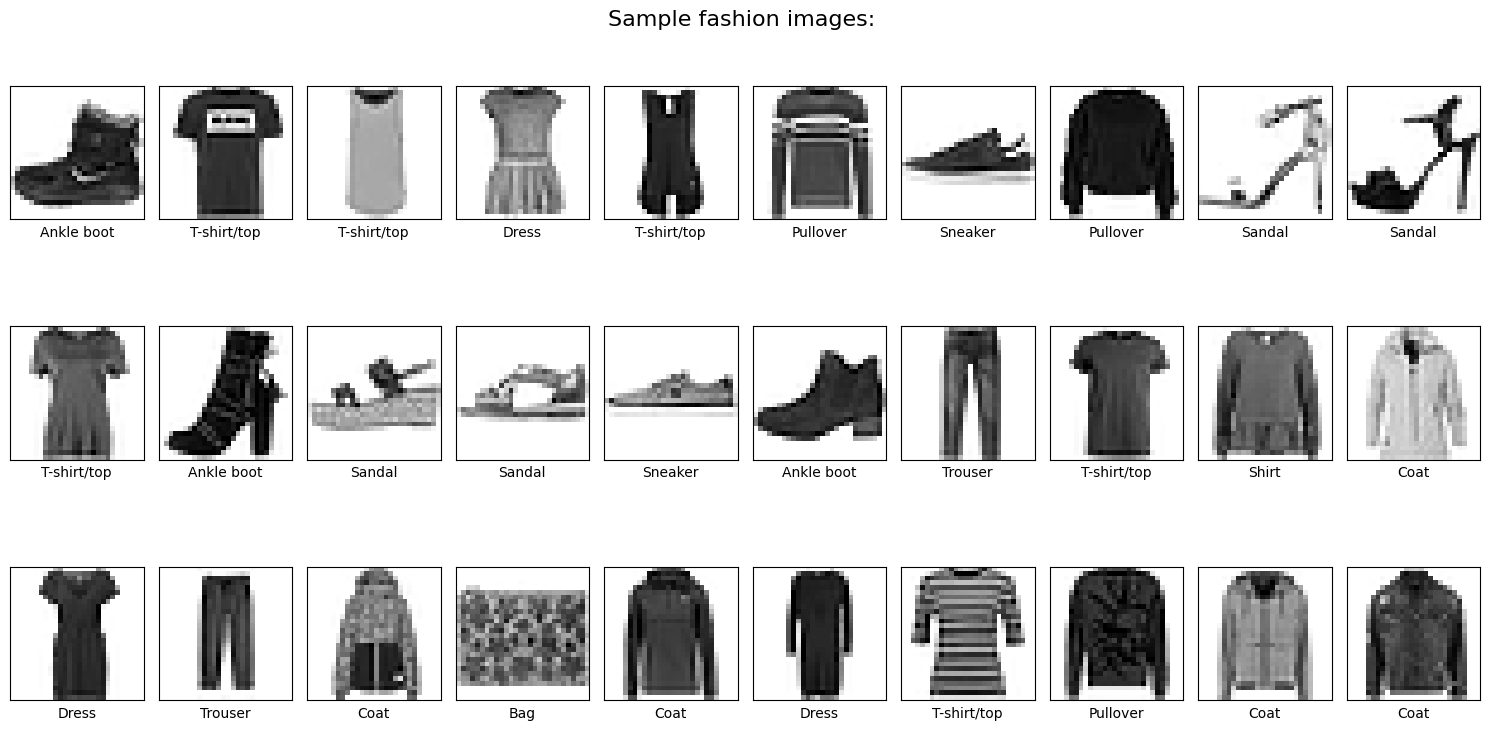

In [46]:
plt.figure(figsize=(15, 8))
for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid=False
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

plt.tight_layout()
plt.suptitle("Sample fashion images: ", fontsize=16)
plt.show()

Data Distribution

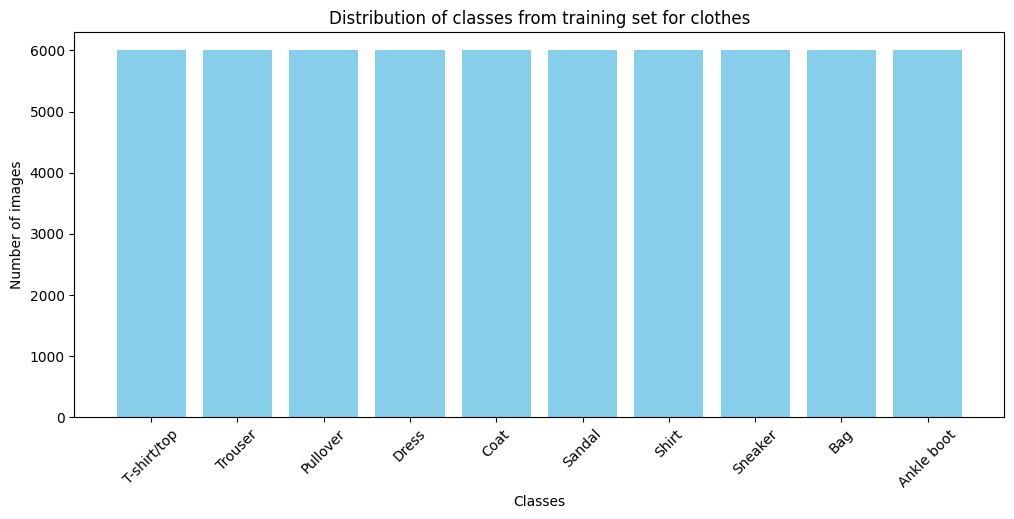

Class distribution in training set: 
T-shirt/top: 6000 images
Trouser: 6000 images
Pullover: 6000 images
Dress: 6000 images
Coat: 6000 images
Sandal: 6000 images
Shirt: 6000 images
Sneaker: 6000 images
Bag: 6000 images
Ankle boot: 6000 images


In [47]:
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(12, 5))
plt.bar(range(len(class_names)), counts, tick_label=class_names, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.title("Distribution of classes from training set for clothes")
plt.xticks(rotation=45)
plt.show()

print("Class distribution in training set: ")
for cls, count in zip(unique, counts):
    print(f"{class_names[cls]}: {count} images")

Data processing normalization

In [57]:
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

x_train_cnn = x_train_norm.reshape((x_train_norm.shape[0], 28, 28, 1))
x_test_cnn = x_test_norm.reshape((x_test_norm.shape[0], 28, 28, 1))

x_train_flat = x_train_norm.reshape((x_train_norm.shape[0], 28*28))
x_test_flat = x_test_norm.reshape((x_test_norm.shape[0], 28*28))

print("After reshaping for CNN: ")
print("x_train_cnn shape: ", x_train_cnn.shape)
print("x_test_cnn shape: ", x_test_cnn.shape)
print("After reshaping for DNN:")
print("x_train_flat shape: ", x_train_flat.shape)
print("x_test_flat shape: ", x_test_flat.shape)

data_dict = {
   'x_test_norm': x_test_norm,
   'x_train_norm': x_train_norm,
   'x_train_cnn': x_train_cnn,
   'x_test_cnn': x_test_cnn, 
   'x_train_flat': x_train_flat,
   'x_test_flat': x_train_flat,
   'y_test_cnn': y_test
}

with open('fashion_mnist_data2.pkl','wb') as f:
    pickle.dump(data_dict, f)

# print(data_dict)

x_mere = data_dict['x_test_cnn']
print(x_mere.shape, x_mere.max())

After reshaping for CNN: 
x_train_cnn shape:  (60000, 28, 28, 1)
x_test_cnn shape:  (10000, 28, 28, 1)
After reshaping for DNN:
x_train_flat shape:  (60000, 784)
x_test_flat shape:  (10000, 784)
(10000, 28, 28, 1) 1.0


Fully-Connected Layer

In [49]:
def create_simple_model():
    model = Sequential([
        Dense(512, activation='relu', input_shape=(28*28,)),
        Dropout(0,2),
        Dense(256, activation='relu'),
        Dropout(0,2),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

simple_model = create_simple_model()
simple_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

simple_model.summary()

/home/alex/pythonProjectBurbeaAlexandru/.ai/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

Testing the Resulting Model

In [50]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history_simple = simple_model.fit(x_train_flat, y_train, epochs=10, batch_size=128,
                                  validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8186 - loss: 0.5102 - val_accuracy: 0.8450 - val_loss: 0.4340
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8634 - loss: 0.3709 - val_accuracy: 0.8673 - val_loss: 0.3556
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8790 - loss: 0.3295 - val_accuracy: 0.8769 - val_loss: 0.3429
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8872 - loss: 0.3036 - val_accuracy: 0.8759 - val_loss: 0.3380
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8934 - loss: 0.2860 - val_accuracy: 0.8783 - val_loss: 0.3428
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9015 - loss: 0.2668 - val_accuracy: 0.8823 - val_loss: 0.3361
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9030 - loss: 0.2589 - val_accuracy: 0.8788 - val_loss: 0.3406
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9077 - loss: 0.2446 - val_accu

Convolutianal Neural Network

In [51]:
# def create_cnn_model():

#     model = Sequential([
#         Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
#         BatchNormalization(),
#         Conv2D(32, kernel_size=(3, 3), activation='relu'),
#         BatchNormalization(),
#         MaxPooling2D(pool_size=(2, 2)),
#         Dropout(0.25),

#         Conv2D(64, kernel_size=(3, 3), activation='relu'),
#         BatchNormalization(),
#         Conv2D(64, kernel_size=(3, 3), activation='relu'),
#         BatchNormalization(),
#         MaxPooling2D(pool_size=(2, 2)),
#         Dropout(0.25),

#         Flatten(), 
#         Dense(256, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.5),
#         Dense(128, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.5),
#         Dense(10, activation='softmax')
#     ])
#     return model

# cnn_model = create_cnn_model()
# cnn_model.compile(optimizer = "adam",
#                   loss = 'sparse_categorical_crossentropy',
#                   metrics = ['accuracy'])
# cnn_model.summary()



In [52]:
def create_alexnet_model(input_shape=(28,28,1), num_classes=10):
    model=Sequential([Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
                      MaxPooling2D((2, 2)),
                      
                      Conv2D(192, (3, 3), activation='relu'),
                      MaxPooling2D((2, 2)),
                      
                      Conv2D(384, (3, 3), activation='relu'),
                      
                      Flatten(),
                      
                      Dense(512, activation='relu'), #activates the matrix information
                      Dropout(0.5),   #avoid overfit
                      
                      Dense(512, activation='relu'),
                      Dropout(0.5),

                      Dense(num_classes, activation='softmax')
                      
                      ])
    
    return model

cnn_model = create_alexnet_model((28, 28, 1), 10)
cnn_model.compile(optimizer="adam",
                  loss='sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
cnn_model.summary


/home/alex/pythonProjectBurbeaAlexandru/.ai/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<bound method Model.summary of <Sequential name=sequential_7, built=True>>

In [53]:
# def create_resnet_model():
#     def residual_block(x, filters):
#         shortcut = x

#         x = Conv2D(filters, (3, 3), padding = 'same', use_bias=False)(x)
#         x = BatchNormalization()(x)
#         x = Activation('relu')(x)

#         x = Conv2D(filters, (3, 3), padding = 'same', use_bias=False)(x)
#         x = BatchNormalization()(x)

#         x = Add()([shortcut, x])
#         x = Activation('relu')(x)
#         return x
    
#     inputs = Input(shape=(28, 28, 1))  # aici sunt layerele modelului

#     x = Conv2D(32, (3, 3), padding='same', use_bias=False)(inputs)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)

#     x = residual_block(x, 32)
#     x = MaxPooling2D((2, 2))(x)
#     x = Dropout(0.25)(x)


#     x = Conv2D(64, (3, 3), padding='same', use_bias=False)(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)


#     x = residual_block(x, 64)
#     x = MaxPooling2D((2, 2))(x)
#     x = Dropout(0.25)(x)


#     x = Flatten()(x)
#     x = Dense(256, activation='relu')(x)
#     x = Dropout(0.5)(x)
#     outputs = Dense(10, activation='softmax')(x)

#     model = Model(inputs=inputs, outputs=outputs)
#     return model

# cnn_model = create_resnet_model()
# cnn_model.compile(optimizer = "adam",
#                   loss = 'sparse_categorical_crossentropy',
#                   metrics = ['accuracy'])
# cnn_model.summary()
# cnn_model.save("cnn_resnet_model.h5")

In [54]:
# def create_vggnet_model():
#     model = Sequential([
#         Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
#         BatchNormalization(),
#         Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
#         BatchNormalization(),
#         MaxPooling2D(pool_size=(2, 2)),
#         Dropout(0.25),

#         Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
#         BatchNormalization(),
#         Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
#         BatchNormalization(),
#         MaxPooling2D(pool_size=(2, 2)),
#         Dropout(0.25),

#         Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
#         BatchNormalization(),
#         Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
#         BatchNormalization(),
#         MaxPooling2D(pool_size=(2, 2)),
#         Dropout(0.25),

#         Flatten(),
#         Dense(256, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.5),
#         Dense(128, activation='relu'), 
#         BatchNormalization(), 
#         Dropout(0.5),
#         Dense(64, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.5),
#         Dense(10, activation='softmax')
#     ])
#     return model

# cnn_model = create_vggnet_model()
# cnn_model.compile(optimizer = "adam",
#                   loss = 'sparse_categorical_crossentropy',
#                   metrics = ['accuracy'])
# cnn_model.summary()
# cnn_model.save("cnn_model.h5")

In [55]:
cnn_model = create_alexnet_model()
cnn_model.compile(optimizer = "adam",
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
cnn_model.summary()
cnn_model.save("cnn_alexnet_model.h5")

early_stopping_cnn = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 3, restore_best_weights=True)
reduce_l4r = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor= 0.5, patience= 2)

history_cnn = cnn_model.fit(x_train_cnn, y_train, epochs=7, batch_size=128,
                            validation_split=0.2,
                            callbacks=[early_stopping_cnn, reduce_l4r])

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 11, 11, 192)    │       110,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 3, 3, 384)      │       663,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3456)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 512)            │     1,769,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,813,130 (10.73 MB)

 Trainable params: 2,813,130 (10.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/7
 26/375 ━━━━━━━━━━━━━━━━━━━━ 38s 112ms/step - accuracy: 0.2586 - loss: 1.9628

KeyboardInterrupt: 

Compare Training History

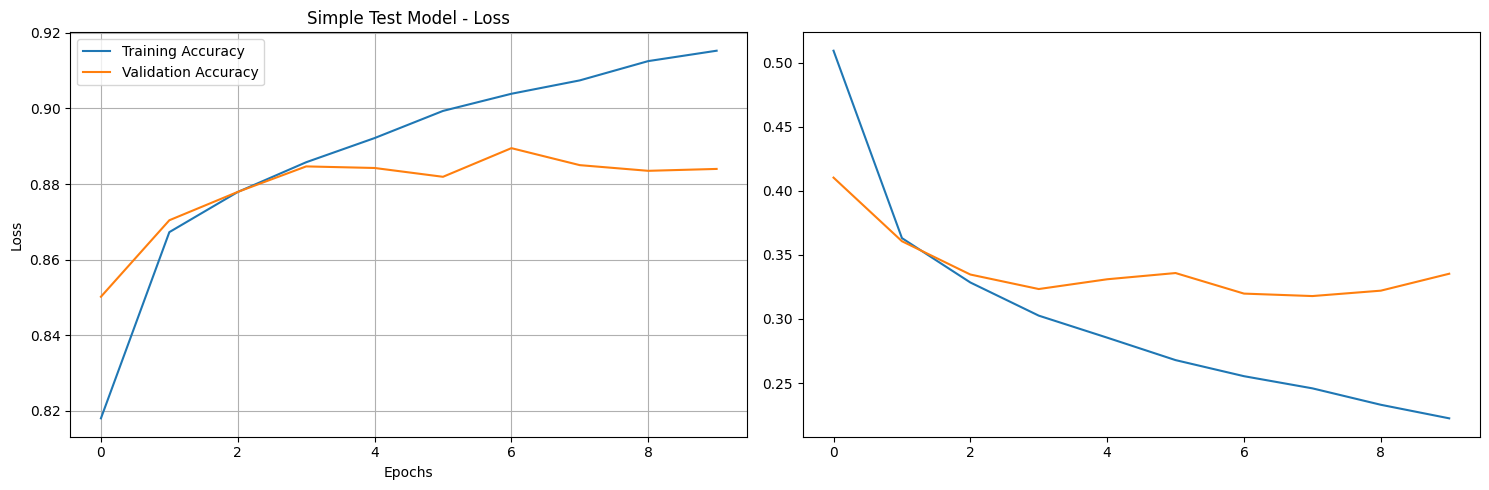

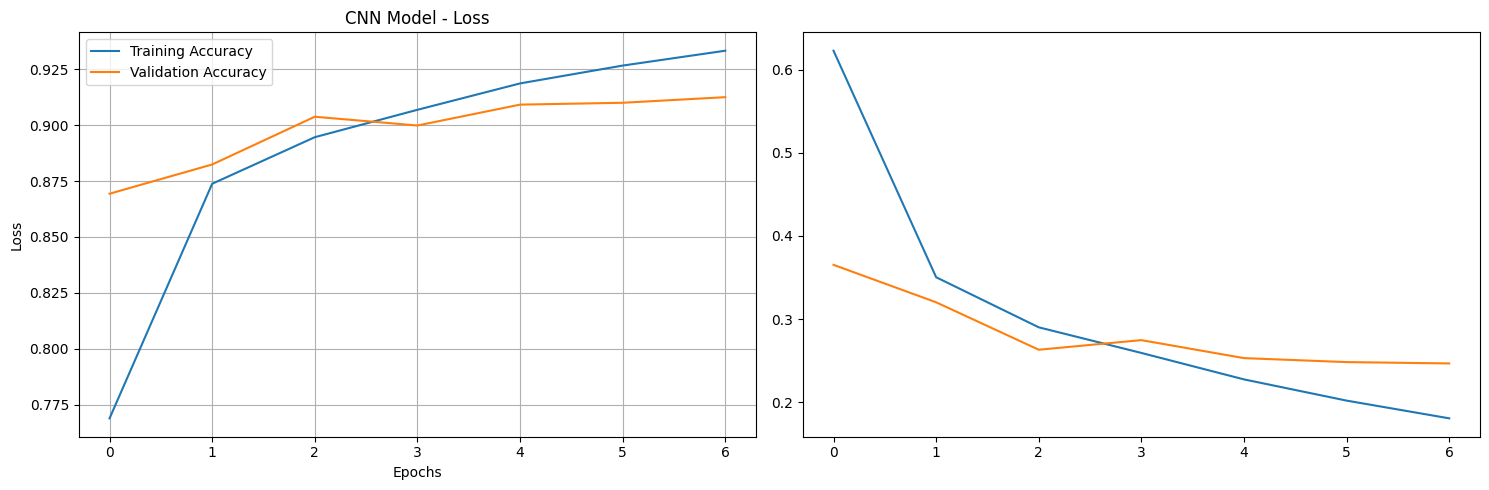

In [ ]:
def plot_training_history(history, title):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')

    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.set_title(f'{title} - Accuracy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')

    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title(f'{title} - Loss')
    ax1.legend()
    ax1.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history(history_simple, "Simple Test Model")
plot_training_history(history_cnn, "CNN Model")

Evaluate Models on Test Set

In [ ]:
simple_test_loss, simple_test_acc = simple_model.evaluate(x_test_flat, y_test, verbose= 2)
print(f"Simple model Test Accuracy: {simple_test_acc:.4f}, Test Loss: {simple_test_loss:.4f}")

cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose= 2)
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}, Test Loss: {cnn_test_loss:.4f}")

print("CNN improved accuracy over Simple model by {:.2f}%".format((cnn_test_acc - simple_test_acc)*100))

313/313 - 1s - 3ms/step - accuracy: 0.8769 - loss: 0.3442
Simple model Test Accuracy: 0.8769, Test Loss: 0.3442
313/313 - 4s - 14ms/step - accuracy: 0.9094 - loss: 0.2573
CNN Test Accuracy: 0.9094, Test Loss: 0.2573
CNN improved accuracy over Simple model by 3.25%


Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
Confusion Matrix:
 [[788   3  20  49   2   1 131   0   6   0]
 [  1 986   0  11   0   0   0   0   2   0]
 [  9   1 852  13  59   0  66   0   0   0]
 [  3  11   8 938  17   0  23   0   0   0]
 [  0   2  28  18 872   0  80   0   0   0]
 [  0   0   0   0   0 984   0   9   0   7]
 [ 74   2  51  41  59   0 770   0   3   0]
 [  0   0   0   0   0   5   0 972   0  23]
 [  5   0   3   2   6   5   7   6 966   0]
 [  1   0   0   0   0   4   0  29   0 966]]


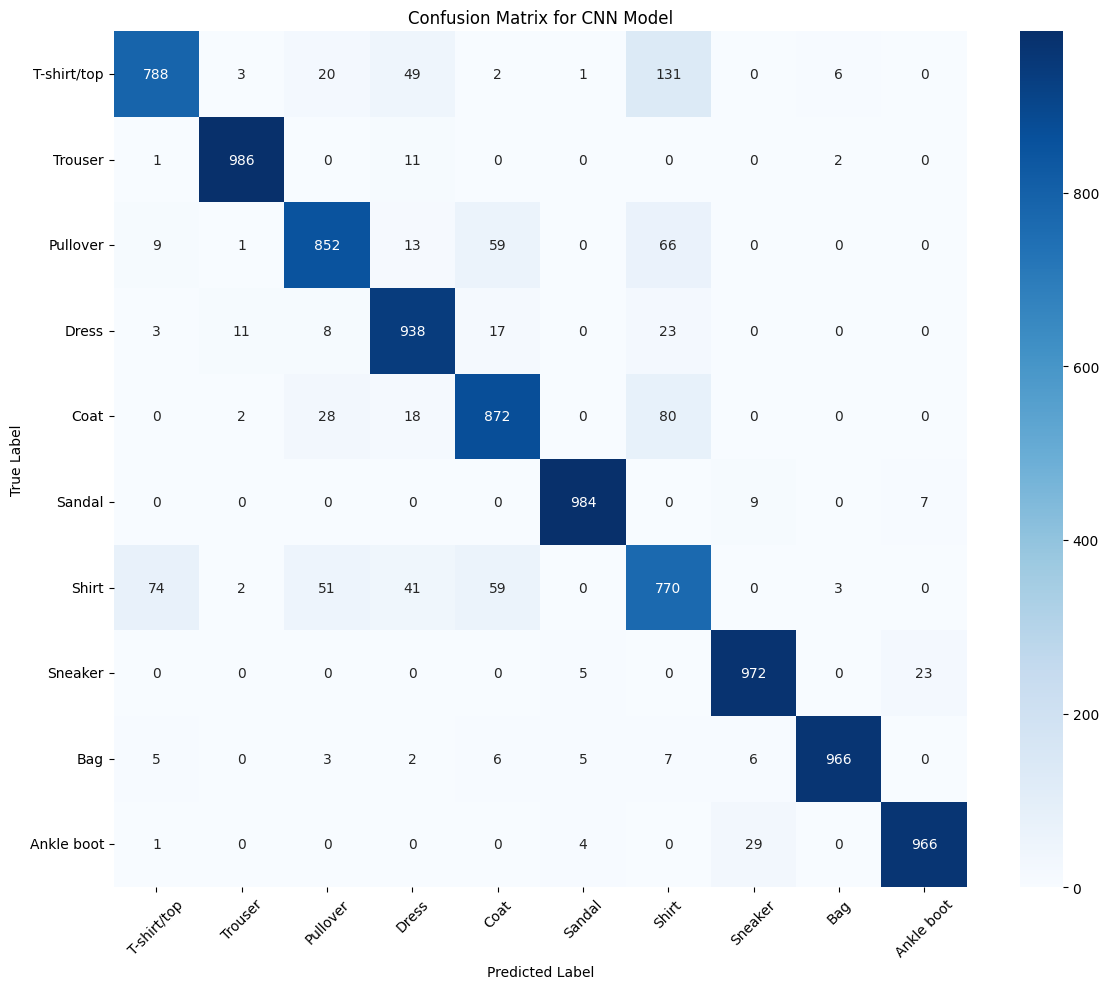

In [ ]:
y_pred= cnn_model.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)

cm= confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CNN Model')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Graph Statistics on Images: Most Correct Image Predicitions

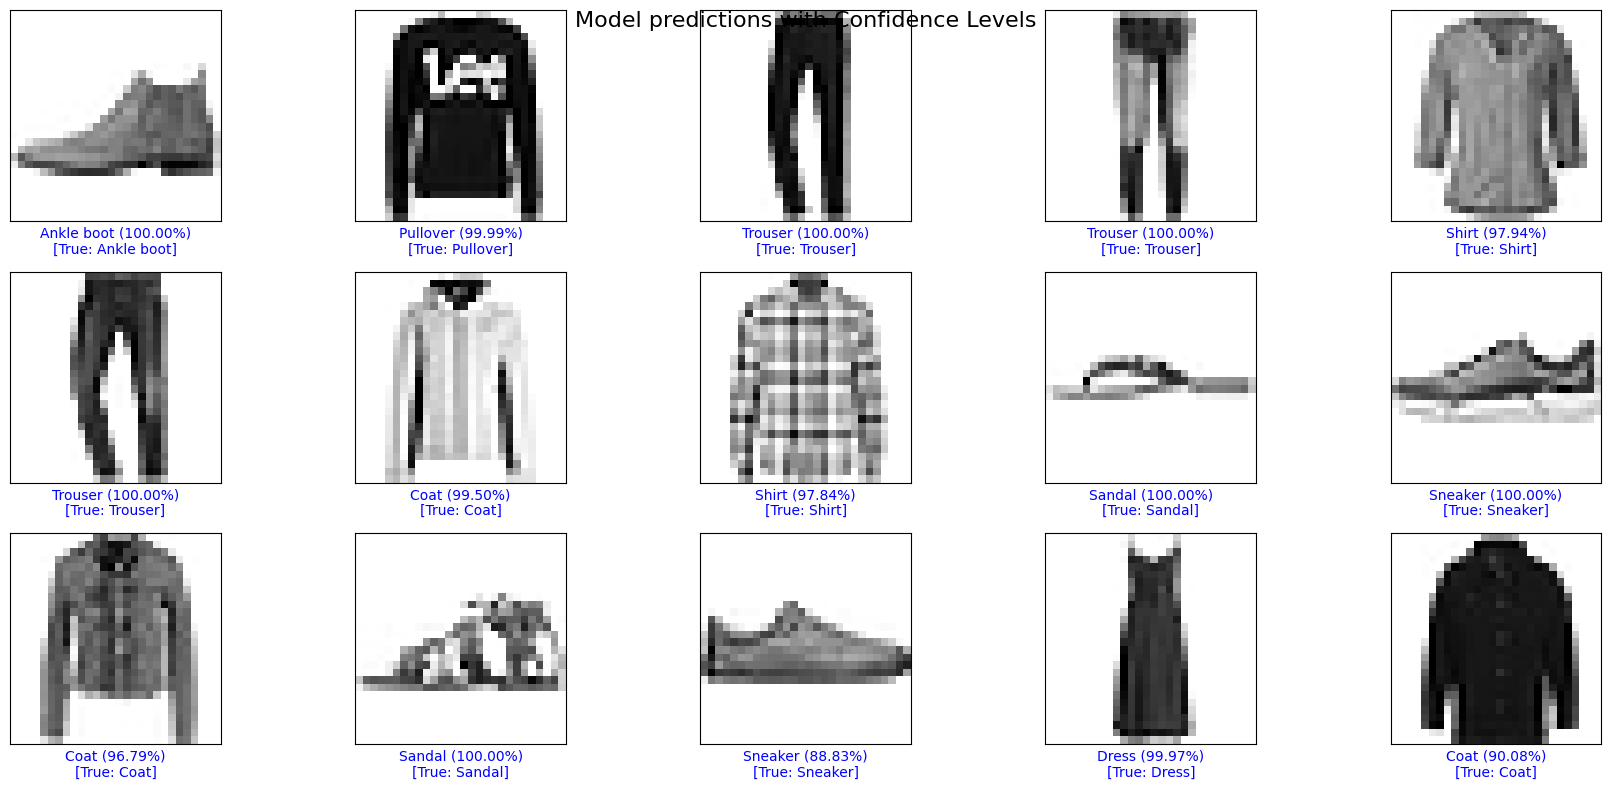

In [ ]:
def plot_prediction(images, true_labels, pred_labels, pred_props, num_images):
    plt.figure(figsize=(18, 8))
    for i in range(num_images):
        plt.subplot(3, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        # plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        color='blue' if pred_labels[i] == true_labels[i] else 'red'

        predicted_label=class_names[pred_labels[i]]
        true_labels_name=class_names[true_labels[i]]
        confidence=pred_props[i][pred_labels[i]]

        plt.xlabel(f"{predicted_label} ({confidence*100:.2f}%)\n[True: {true_labels_name}]", color=color)


    plt.tight_layout()
    plt.suptitle("Model predictions with Confidence Levels", fontsize=16)
    plt.show()

plot_prediction(x_test_cnn, y_test, y_pred_classes, y_pred, 15)

Analyze Misclassification: Most Wrong Image Predictions

Number of misclassified images:  906
Total test images:  10000
Classification report:
               precision    recall  f1-score   support

 T-shirt/top       0.89      0.79      0.84      1000
     Trouser       0.98      0.99      0.98      1000
    Pullover       0.89      0.85      0.87      1000
       Dress       0.88      0.94      0.91      1000
        Coat       0.86      0.87      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.71      0.77      0.74      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Procent of misclassified images: 9.06%


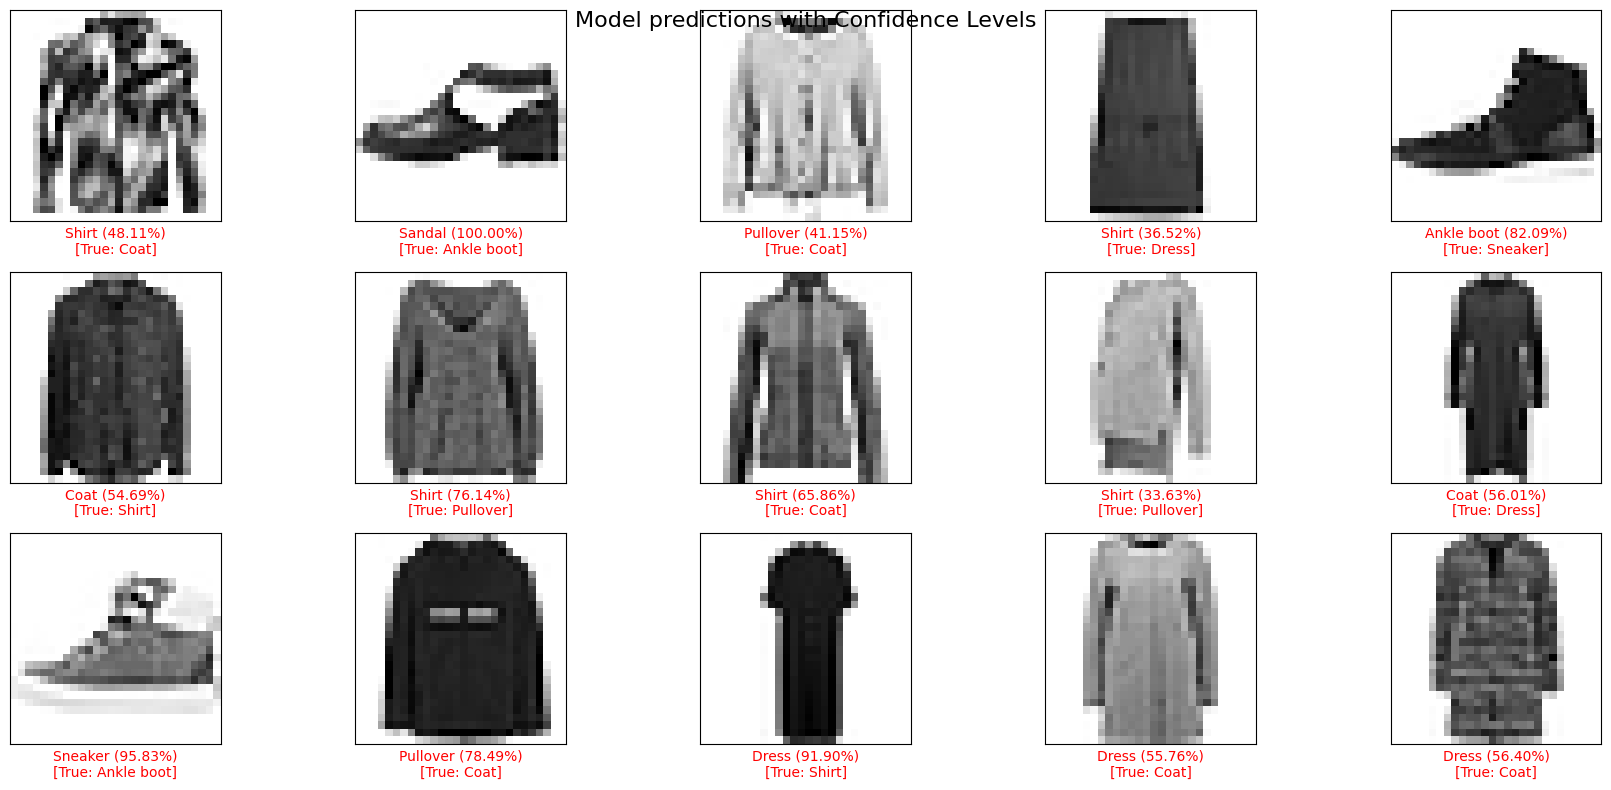

In [ ]:
misclassified_indices = np.where(y_pred_classes != y_test)[0]
print("Number of misclassified images: ", len(misclassified_indices))
print("Total test images: ", len(y_test))
print("Classification report:\n", classification_report(y_test, y_pred_classes, target_names=class_names))
print("Procent of misclassified images: {:.2f}%".format(len(misclassified_indices)/len(y_test)*100))

if len(misclassified_indices) > 0:
    sample_indeces = misclassified_indices[:15]

    plot_prediction(x_test_cnn[sample_indeces],
                    y_test[sample_indeces],
                    y_pred_classes[sample_indeces],
                    y_pred[sample_indeces],
                    15)

Statistics With What Is In The Models And What Should Be Modified

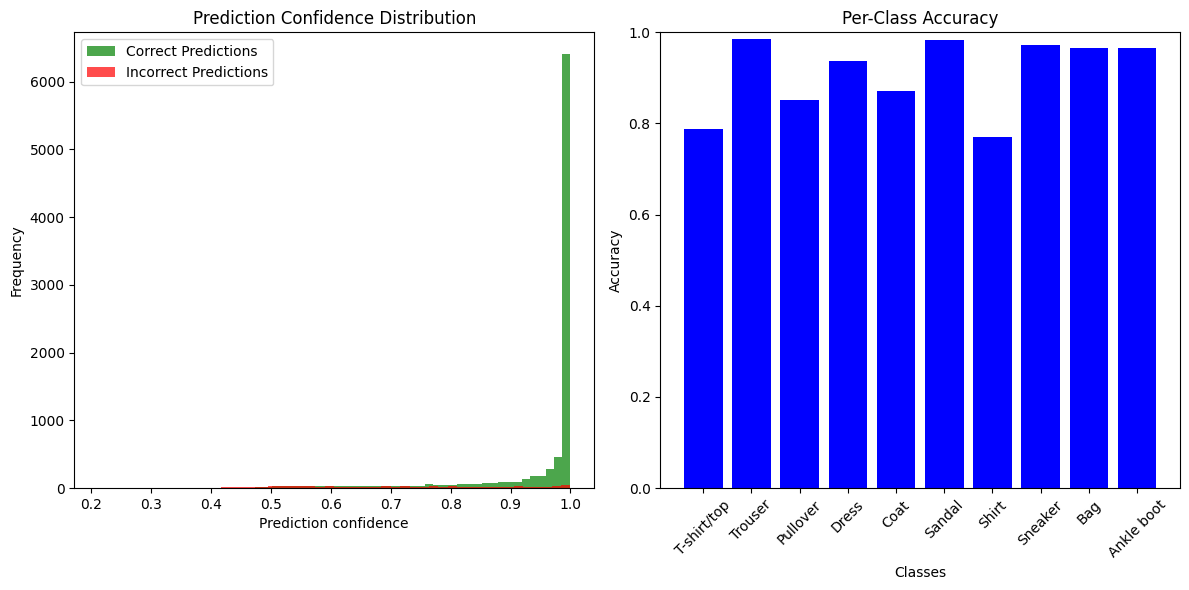

Classification Report: 
               precision    recall  f1-score   support

 T-shirt/top       0.89      0.79      0.84      1000
     Trouser       0.98      0.99      0.98      1000
    Pullover       0.89      0.85      0.87      1000
       Dress       0.88      0.94      0.91      1000
        Coat       0.86      0.87      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.71      0.77      0.74      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
max_probs = np.max(y_pred, axis= 1)
correct_predictions = (y_pred_classes == y_test)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(max_probs[correct_predictions], bins=50, color='green', alpha=0.7)
plt.hist(max_probs[~correct_predictions], bins=50, color='red', alpha=0.7)

plt.xlabel('Prediction confidence')
plt.ylabel('Frequency')

plt.title('Prediction Confidence Distribution')
plt.legend(['Correct Predictions', 'Incorrect Predictions'])

plt.subplot(1, 2, 2)
class_accuracies = []
for i in range(10):
    class_indices = np.where(y_test == i)[0]
    class_correct = np.sum(y_pred_classes[class_indices] == y_test[class_indices])
    class_accuracy = class_correct / len(class_indices)
    class_accuracies.append(class_accuracy)

plt.bar(range(10), class_accuracies, color='blue')
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.xticks(range(10), class_names, rotation=45)
plt.ylim([0,1])
plt.tight_layout()
plt.show()

print("Classification Report: \n", classification_report(y_test, y_pred_classes, target_names=class_names))

for i in enumerate(class_names):
    class_correct = np.sum(y_pred_classes[class_indices] == y_test[class_indices])
    class_accuracy = class_correct / len(class_indices)

Saving the Models found via Keras

In [ ]:
cnn_model.save('fashion_mnist_cnn_model.h5')
print("Model saved as 'fashion_mnist_cnn_model.h5'")

cnn_model.save('fashion_mnist_cnn_model.keras')
print("Model saved as 'fashion_mnist_cnn_model.keras'")

Model saved as 'fashion_mnist_cnn_model.h5'
Model saved as 'fashion_mnist_cnn_model.keras'


Prediction Model For 1 Image

Testing with image index: 8467


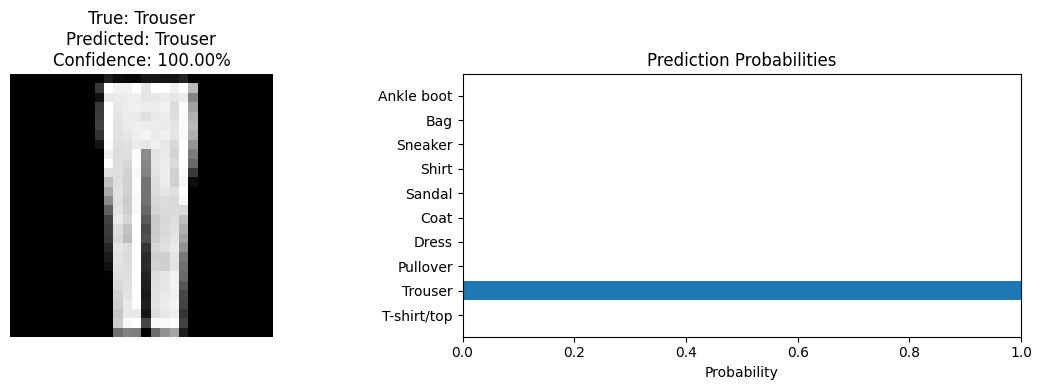

(1, 100.0)

In [ ]:
def predict_single_image(model, image_index):
    image = x_test_cnn[image_index]
    true_label = y_test[image_index]

    prediction = model.predict(image.reshape(1, 28, 28, 1), verbose = 0)
    predicted_class = np.argmax(prediction)
    confidence = prediction[0][predicted_class] * 100

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    ax1.imshow(image.reshape(28, 28), cmap='gray')
    ax1.set_title(f"True: {class_names[true_label]}\nPredicted: {class_names[predicted_class]}\nConfidence: {confidence:.2f}%")
    ax1.axis('off')

    ax2.barh(class_names, prediction[0])
    ax2.set_xlabel('Probability')
    ax2.set_title('Prediction Probabilities')
    ax2.set_xlim([0, 1])

    plt.tight_layout()
    plt.show()

    return predicted_class, confidence

random_index = np.random.randint(0, len(x_test))
print(f"Testing with image index: {random_index}")
predict_single_image(cnn_model, random_index)

SqueezeNet For Food 